# High dimensional integration by Metropolis

The classical method for high-dimensional integration is the
*Vegas* algorithm, discussed before. However, *Vegas*
can not resolve poles, which are not along one of the axis.

Problem in physics  very commonly require integrals over space of many
coordinates, and might have the form:
\begin{eqnarray}
I(\vec{r}_0) = \int f(\vec{r}_0,\vec{r}_1,\vec{r}_2,\cdots,\vec{r}_N) d^3\vec{r}_1 d^3\vec{r}_2\cdots d^3\vec{r}_N
\end{eqnarray}
Here $f$ might have poles for many combinations of $\vec{r}_i-\vec{r}_j$  or
$\vec{r}_i-\vec{r}_j-\vec{r}_k$, etc.

For a concrete example, we will think of the following convolutions
\begin{eqnarray}
I(\vec{r}_0) = {\cal N}
\int 
e^{-\frac{(\vec{r}_1-\vec{r}_0)^2}{w^2}} 
e^{-\frac{(\vec{r}_2-\vec{r}_1)^2}{w^2}} \cdots
e^{-\frac{(\vec{r}_{N-1}-\vec{r}_{N})^2}{w^2}} 
e^{-\frac{{\vec{r}_N}^2}{w^2}} 
d^3\vec{r}_1  d^3\vec{r}_2\cdots d^3\vec{r}_N
\end{eqnarray}
with noralization 
${\cal N}= \frac{(N+1)^{3/2}}{(w \sqrt{\pi})^{3 N}},$
the value of the integral is 
$I(\vec{r}_0)=e^{-\frac{\vec{r}_0^2}{(N+1) w^2}}$


If width $w$ is small, this is very difficult problem for MC,
even for moderate values of $N$.


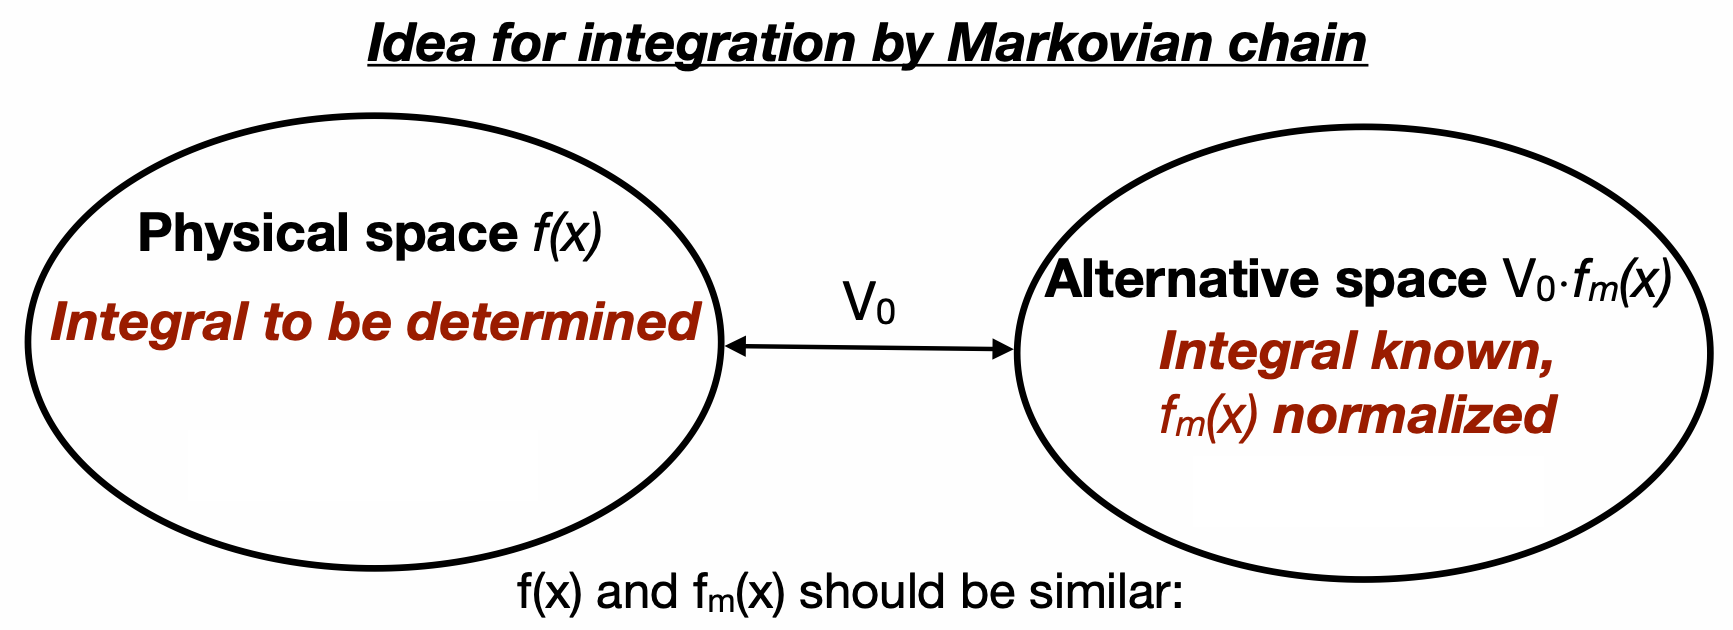

We could create a Markov's chain and take as the probability for a step proportionaly to $|f(x)|$, i.e, the $T(X\rightarrow X') = |f(X')|/|f(X)|$. Here $X$ stands for configuration $(\vec{r}_0,\vec{r}_1,\cdots,\vec{r}_N)$.

We would meassure $f(X)/|f(X)|=\textrm{sign}(f(X))$. As a result we would get correct shape of the function $I(\vec{r}_0)$, however, the integral itself would be unknown. 

## Jumping between spaces

The most common way to determine the unknown constant is to define two spaces, the **Physical space** and the **Alternative space**. The function in the alternative space should be as similar as possible to the function we are integrating, but its integral must be known, and we should be allowed to jump between the two spaces. Suppose the function in the alternative space is $V_0 f_m(X)$, where $f_m(X)$ is normalized to unity ($\int f_m(X) dX=1$) and positive function, and $V_0$ is an arbitrary constant.



Probability density in the physical space $P(X)$ is then taken to be proportional to $|f(x)|$ in the physical Hilbert space, and $V_0 f_m(x)$ in the alternative space. The probability to visit a configuration $X$ in the physical and alternative space would be:
\begin{eqnarray}
& P_{physical}(X) \propto & |f(X)| \; {\cal C}\\
& P_{alternative}(X) \propto & V_0 f_m(X) \; {\cal C}
\end{eqnarray}

In Metropolis we would have two types of moves:
* jump from configuration $X\rightarrow X'$
* jump between the two spaces.

If we are in the Physical Hilbert space, we would accept the step with $T(X\rightarrow X') = |f(X')|/|f(X)|$. If we are in alternative space, we would accept the step with 
$T(X\rightarrow X') = f_m(X')/f_m(X)$, and if we are jumping from Physical to the alternative space, we would have $T(X_p\rightarrow X'_a) = V_0 f_m(X'_a)/|f(X)|$.

More precisely, if there is non-symmetric trial step probability, the Metropolis acceptance probability would be $A(X\rightarrow X')=min\left(1,\frac{|f(X')|\omega_{X'\rightarrow X}}{|f(X)|\omega_{X\rightarrow X'}}\right)$, where $\omega_{X'\rightarrow X}$ is the trial step probability. But let's first think of steps which have symmetric trial step probability.

We would than sample the following quantities 
\begin{eqnarray}
V_{physical}= \sum_{i=physical} \frac{f(X_i)}{|f(X_i)|}
\end{eqnarray}
when we are in the physical space, and when we are in alternative space we would just count steps in this space
\begin{eqnarray}
V_{alternative}= \sum_{i=alternative} 1
\end{eqnarray}

These quantities will converge to the following values
\begin{eqnarray}
V_{physical} &=& {\cal C} \int dX\; |f(X)|  \frac{f(X)}{|f(X)|}\\
V_{alternative} &=& {\cal C} \int dX\; V_0 |f_m(X)| 1
\end{eqnarray}
where $C$ is an arbitrary number, which we do not know. This is because the probability to reach a configuration $X$ in the Physical space is $\propto dX |f(X)|$ and in alternative space is $\propto dX V_0 |f_m(X)|$.


Because the function in alternative space is normalized $\int dX |f_m(x)|=1$, we conclude that 
\begin{eqnarray}
\frac{V_{physical}}{V_{alternative}}=\frac{1}{V_0} \int dX f(X)
\end{eqnarray}
hence we know the integral 
\begin{eqnarray}
\int dX f(X) = V_0 \frac{V_{physical}}{V_{alternative}}=V_0 \frac{\sum_{i\in physical} \textrm{sign}(f(X_i))}{\sum_{i\in alternative} 1}
\end{eqnarray}


The art in this approach is to find a good function $f_m(X)$, which we know how to normalize, and adjust $V_0$ so that we spent some finite (but not too much time) in alternative space. A good rule is 90% in physical space, and 10% in alternative space.

The best approach is to self-consistently determine both $f_m(X)$ and the constant $V_0$ during the sampling.

But before we discuss how to determine both, we would sketch a simpler, and usually even more efficient, algorithm.

## Evaluation of both functions on each configuration

Alternatively we can define the probability for visiting configuration $X$ to be 
\begin{eqnarray}
P \propto |f(X)|+ V_0 f_m(X)
\end{eqnarray}
and we could have only the physical space of configurations $X$, on which we would simultaneously evaluate both $f(X)$ and $f_m(X)$.  

We have freedom to adjust $V_0$. The idea is to adjust $V_0$ so that on average $|f(X)|$ is around 10-times larger than $V_0 f_m(X)$. As a result we would still visit most often those configurations in which function $|f(X)|$ is large, and if $f_m(X)$ is similar to $f(X)$ we would not visit configurations where $|f(X)|$ is very small. Even if the overlap between $f(X)$ and $f_m(X)$ is small, we will still visit configurations where $f(X)$ is large more often, because we will make sure that $V_0$ is such that on avergae $f(X)$ contributes more to the weight that $V_0 f_m(X)$.



The transition probability is therefore 
\begin{eqnarray}
T(X\rightarrow X') = \frac{|f(X')| + V_0 f_m(X')}{|f(X)| + V_0 f_m(X)}
\end{eqnarray}

We will sample two quantities
\begin{eqnarray}
V_{physical} = \sum_i \frac{f(X_i)}{|f(X_i)| + V_0 f_m(X_i)}\\
V_{alternative} = \sum_i \frac{V_0 f_m(X_i)}{|f(X_i)| + V_0 f_m(X_i)}
\end{eqnarray}

The two quantities will converge towards
\begin{eqnarray}
V_{physical} &=& {\cal C}\int dX\; (|f(X)| + V_0 f_m(X)) \frac{f(X)}{|f(X)| + V_0 f_m(X)} = {\cal C} \int dX f(X) \\
V_{alternative} &=& {\cal C} \int dX\; (|f(X)| + V_0 f_m(X)) \frac{V_0 f_m(X)}{|f(X)| + V_0 f_m(X)}={\cal C}\; V_0
\end{eqnarray}

The desired integral will again be
\begin{eqnarray}
\int dX f(X) = V_0 \frac{V_{physical}}{V_{alternative}}
\end{eqnarray}

During the simulations of the Markov chain we will adjust $V_0$ so that 
\begin{eqnarray}
\frac{\widetilde{V}_{physical}}{V_{alternative}} \approx 10,
\end{eqnarray}
where 
\begin{eqnarray}
\widetilde{V}_{physical}=\sum_i \frac{|f(X_i)|}{|f(X_i)| + V_0 f_m(X_i)}
\end{eqnarray}

Suppose that during simulation we realize that currently $\frac{\widetilde{V}_{physical}}{V_{alternative}} \approx 1$. It means that $V_{alternative}$ is around 10-times too large, hence we would reduce $V_0$ for a factor (maybe 2 initially, and than recheck). We would also need to reduce with the same constant the current sum $V_{alternative}$, because it is proportional to $V_0$. We will keep adjusting $V_0$ untill the ratio of $\frac{\widetilde{V}_{physical}}{V_{alternative}}$ is close to the desired number.

## Measuring function

We are left to determine the optimal function $f_m(X)$, which is as similar as possible to $|f(X)|$, but with added constrained that is normalizable, i.e., $\int dX f_m(X)=1$.

An obvious choice (think of Vegas) is a separable ansatz:
\begin{eqnarray}
f_m(X=(\vec{r}_1,\vec{r}_r,\cdots,\vec{r}_N))=g_1(r_1) g_2(r_2)\cdots g_N(r_N)
\end{eqnarray}

To determine the projections $g_i(r_i)$, we would self-consistently project the sampled function $|f(X)|$ to all axis, just like in Vegas algorithm:
\begin{eqnarray}
g_i(x)\propto \int d\vec{r_1} d\vec{r}_2 \cdots d\vec{r}_N |f(X)|\delta(r_i-x)
\end{eqnarray}

The integration of separable function is simple
\begin{eqnarray}
\int dX f_m(X) = \prod_{i} \int d\vec{r}_i g_i(r_i)
\end{eqnarray}
To avoid systematic error, we will not treat $g_i(r_i)$ function as continuous function, but rather as a step-wise constant function, with the following proeprty
\begin{eqnarray}
g(x) = \sum_{l=0}^{M-1} g[l]\theta(x_l<x<x_{l+1}).
\end{eqnarray}
Unfortunately this makes analysis tedious, and integrals a bit more involved.


Newertheless, for separable function, we can readily compute
\begin{eqnarray}
&&1D : \int d\vec{r}_i g_i(r_i)= \Delta \sum_{l=0}^{M-1} g_i[l]\\
&&3D : \int d\vec{r}_i g_i(r_i)= \frac{4\pi \Delta^3}{3} \sum_{l=0}^{M-1} ((l+1)^3-l^3)g_i[l]
\end{eqnarray}

For more complicated ansatz of convolutions, the analytic formulas can still be derived, and the equations are given below.

# Implementation

Here we will not show all details of implementing the measuring function. It is implemented in module `mweight.py`, which we will include here. We will rather implement Metropolis Markov's chain and wew will use 3D-convolutions as the measuring function.

To test the implementation, we will use Gaussian functions, with peaks along the diagonals (not along the axes). The Gausian's have the form
\begin{eqnarray}
f(k_0,k_1,\cdots k_{N-1}) = C e^{k_{N-1}^2/w^2} e^{-|k_{N-2}-k_{N-1}|^2/w^2} e^{-|k_{N-3}-k_{N-2}|^2/w^2}\cdots e^{-|k_1-k_0|^2/w^2}
\end{eqnarray}
where 
\begin{eqnarray}
C = \frac{N^{3/2} }{ ( \sqrt{\pi} w )^{3(N-1)}}
\end{eqnarray}


In [1]:
from scipy import *
from mweight import *
from numpy import linalg
from numpy import random
from scipy import special
import sys
import numpy as np

class FuncNDiag:
    """  Gaussian through all diagonals k_i=k_j, i.e.:
    We have the following variables : k_0, k_1, k_2, ... k_{N-1}
    The function is
       fPQ = exp(k_{N-1}^2/width^2) * exp(|k_{N-2}-k_{N-1}|^2/width^2) * exp(-|k_{N-3}-k_{N-2}|^2/width^2) *...* exp(-|k_1-k_0|^2/width^2) * normalization
   We integrate only over k_1,k_2,...k_{N-1} and keep k_0 as external independent variable.
   We want the final result to be
      exp(-k_0^2/(width^2*N)) = Integrate[ fPQ d^3k_1 d^3k_2....d^3k_{N-1} ]
   Hence the normalization is
       normalization = N^(3/2) / ( sqrt(pi)*width )^(3(N-1))
    """
    def __init__(self, width, ndim):
        self.width = width   # width of gaussians
        self.Ndim = ndim
        self.cnrm = ((sqrt(pi)*self.width)**3 )**(Ndim-1)/sqrt(Ndim)**3  # integral of gaussian convolution

    def __call__(self, momentum):
        kn = np.linalg.norm( momentum[-1] )
        res = exp( -(kn/self.width)**2 )/self.cnrm
        for i in range(len(momentum)-1):
            dk = np.linalg.norm( momentum[i+1]-momentum[i] )
            res *= exp( -(dk/self.width)**2 )
        return res


We will define several parameters for MC integration

In [2]:
class params:
    def __init__(self):
        self.kF = 1.             # typical momentum
        self.cutoff = 5*self.kF  # integration cutoff
        self.dkF = 0.1*self.kF   # the size of a step
        #
        self.Nitt = 2000000   # total number of MC steps
        self.Ncout = 50000    # how often to print
        self.Nwarm = 1000     # warmup steps
        self.tmeassure = 10   # how often to meassure
        #
        self.Nbin = 129       # how many bins for saving the histogram
        self.V0norm = 2e-2    # starting V0
        self.dexp = 6         # parameter for measuring function at the first iteration
        
        self.recomputew = 5e4/self.tmeassure # how often to check if V0 is correct
        self.per_recompute = 7 # how often to recompute auxiliary measuring function

This is the core of the algorithm, which implements the Metropolis random walk, and measures both functions $f$ and $f_m$ on each configuration, using $|f|+V_0 f_m$ as the weight of each configuration.

In [3]:
def IntegrateByMetropolis2(func, qx, p):
    """ Integration by Metropolis:
          func(momentum)   -- function to integrate
          qx               -- mesh given by a user
          p                -- other parameters
        Output:
          Pval(qx)
    """
    random.seed(0)
    Pval = zeros(len(qx))
    Pnorm = 0.0
    Pval_sum = 0.0
    Pnorm_sum = 0.0
    V0norm = p.V0norm
    dk_hist = 1.0
    Ndim = func.Ndim  # dimensions of the problem
    inc_recompute = (p.per_recompute+0.52)/p.per_recompute
    
    momentum = zeros((Ndim,3)) #
    iQ = int(len(qx)*random.rand()) # which bin do we currently visit, iQ is current qx[iQ]
    momentum[1:,:] = random.random((Ndim-1,3)) * p.kF / sqrt(3.)
    momentum[0,:] = [0,0,qx[iQ]]

    mweight = meassureWeight(p.dexp, p.cutoff, p.kF, p.Nbin, Ndim) # measuring function fm in alternative space
    
    fQ = func(momentum), V0norm * mweight( momentum )
    print('starting with f=', fQ, '\nstarting momenta=', momentum)

    Nmeassure = 0
    Nall_q, Nall_k, Nall_w, Nacc_q, Nacc_k = 0, 0, 0, 0, 0
    c_recompute = 0
    for itt in range(p.Nitt):
        iloop = int( Ndim * random.rand() ) # which variable to change
        accept = False
        if (iloop == 0):  # changing external variable : Q==k0
            Nall_q += 1
            tiQ = int( random.rand()*len(qx) )               # trial iQ
            Ka_new = qx[tiQ]  # length of the vector
            th, phi = pi*random.rand(), 2*pi*random.rand()   # spherical angles for vector q in spherical coordinates
            sin_th = sin(th)                                 # trial step probability is proportional to sin(theta) when using sperical coodinates
            Q_sin_th = Ka_new * sin_th
            K_new = array([Q_sin_th*cos(phi), Q_sin_th*sin(phi), Ka_new*cos(th)])
            q2_sin2_old = sum(momentum[iloop,:2]**2)
            q2_old = q2_sin2_old + momentum[iloop,2]**2
            trial_ratio = 1.
            if q2_old != 0:                               # make sure we do not get nan
                sin_th_old = sqrt(q2_sin2_old/q2_old)     
                if sin_th_old != 0:                       # make sure we do not get nan
                    trial_ratio = sin_th/sin_th_old
            accept = True                                 # finally trial step probability
        else:   # changing momentum ik>0
            Nall_k += 1
            dk = (2*random.rand(3)-1)*p.dkF    # performing in cartesian coordinates, where it is simple
            K_new = momentum[iloop,:] + dk
            Ka_new = linalg.norm(K_new)
            trial_ratio = 1.                   # trial step probability is just unity
            accept = Ka_new <= p.cutoff
        if (accept): # trial step successful, accepting the step
            tmomentum = copy(momentum)
            tmomentum[iloop,:] = K_new
            fQ_new = func(tmomentum), V0norm * mweight(tmomentum)
            ratio = (abs(fQ_new[0])+fQ_new[1])/(abs(fQ[0])+fQ[1]) * trial_ratio
            accept = abs(ratio) > 1-random.rand()
            if accept: # the step succeeded
                momentum[iloop] = K_new
                fQ = fQ_new
                if iloop==0:
                        Nacc_q += 1
                        iQ = tiQ
                else:
                        Nacc_k += 1
        
        if (itt >= p.Nwarm and itt % p.tmeassure==0): # below is measuring every p.tmeassure steps
            Nmeassure += 1
            W = abs(fQ[0])+fQ[1]             # this is the weight we are using
            f0, f1 = fQ[0]/W, fQ[1]/W        # the two measuring quantities
            Pval[iQ]  += f0                  # integral up to a constant
            Pnorm     += f1                  # the constant for the integral
            Pnorm_sum += f1
            Wphs  = abs(f0)
            Pval_sum  += Wphs
            mweight.Add_to_K_histogram(dk_hist*Wphs, momentum, p.cutoff, p.cutoff)
            if itt>10000 and itt % (p.recomputew*p.tmeassure) == 0 :
                P_v_P = Pval_sum/Pnorm_sum * 0.1
                change_V0 = 0
                if P_v_P < 0.25 and itt < 0.1*p.Nitt:
                    change_V0 = -1
                    V0norm    /= 2
                    Pnorm     /= 2
                    Pnorm_sum /= 2
                if P_v_P > 4.0 and itt < 0.1*p.Nitt:
                    change_V0 = 1
                    V0norm    *= 2
                    Pnorm     *= 2
                    Pnorm_sum *= 2
                if change_V0:
                    schange = ["V0 reduced to ", "V0 increased to"]
                    print( '   ', itt/1e6, 'M P_v_P=', P_v_P, schange[int( (change_V0+1)/2 )], V0norm )
                    Pval = zeros(len(Pval))
                    Pnorm = 0
                    Nmeasure = 0
                    
                if (c_recompute==0 and itt<0.5*p.Nitt):
                    p.per_recompute = int(p.per_recompute*inc_recompute+0.5)
                    dk_hist *= mweight.Normalize_K_histogram()
                    if dk_hist < 1e-8:
                        dk_hist = 1.0
                    mweight.Recompute()
                    fQ = (fQ[0], V0norm * mweight(momentum))
                c_recompute += 1
                if c_recompute>=p.per_recompute : c_recompute = 0
                
        if (itt+1)% p.Ncout == 0 :
            P_v_P = Pval_sum/Pnorm_sum * 0.1
            Qa = qx[iQ]
            ka = linalg.norm(momentum[1,:])
            ratio = (abs(fQ_new[0])+fQ_new[1])/(abs(fQ[0])+fQ[1])
            print( '%9.6fM Q=%5.3f k=%5.3f fQ_new=%12.4g,%12.4g fQ_old=%12.4g,%12.4g P_v_P=%10.6f' % (itt/1e6, Qa, ka, fQ_new[0], fQ_new[1], fQ[0], fQ[1], P_v_P) )
    

    Pval *= len(qx) * V0norm / Pnorm

    print( 'Total acceptance rate=', (Nacc_k+Nacc_q)/(p.Nitt+0.0), 'k-acceptance=', Nacc_k/(Nall_k+0.0), 'q-acceptance=', Nacc_q/(Nall_q+0.0))
    print( 'k-trials=', Nall_k/(p.Nitt+0.0), 'q-trial=', Nall_q/(p.Nitt+0.0) )
    return Pval


As a test, we will use $6\times 3=18$-dimensional space, and Gaussians of width $1/\sqrt{6}$. The result should be Gaussian of width 1.

In [4]:
from numpy import random

p = params()
Ndim = 6
width = 1./sqrt(Ndim)
fnc = FuncNDiag(width, Ndim)

Nq = 30
qx = linspace( 3*0.5/Nq, 3*(Nq-0.5)/Nq, Nq)
Pval = IntegrateByMetropolis2(fnc, qx, p)


starting with f= (0.00013988835759192925, 4.944703769438448e-07) 
starting momenta= [[0.         0.         1.65      ]
 [0.41291477 0.3480056  0.31458845]
 [0.24459721 0.37290714 0.25264109]
 [0.51486538 0.55637095 0.22138006]
 [0.45710266 0.30535762 0.32796068]
 [0.53439347 0.04101269 0.05030412]]
 0.049999M Q=0.050 k=0.445 fQ_new=       14.35,   4.945e-07 fQ_old=       14.35,   4.945e-07 P_v_P=1874.630834
    0.05 M P_v_P= 1875.0131853517269 V0 increased to 0.04
 0.099999M Q=1.250 k=1.204 fQ_new=      0.9062,   1.504e-06 fQ_old=      0.9062,   1.504e-06 P_v_P=  1.854551
 0.149999M Q=0.050 k=0.249 fQ_new=      0.6769,   2.096e-05 fQ_old=      0.6769,   2.096e-05 P_v_P=  1.961248
 0.199999M Q=0.150 k=0.526 fQ_new=       10.22,    0.003299 fQ_old=       10.22,    0.003299 P_v_P=  1.677122
 0.249999M Q=0.050 k=0.493 fQ_new=       15.94,    0.006154 fQ_old=       15.94,    0.006154 P_v_P=  1.393189
 0.299999M Q=0.750 k=0.463 fQ_new=       1.993,   0.0003724 fQ_old=       1.993,   0.00037

We expect the result to be gausian function with width of unity, i.e.,

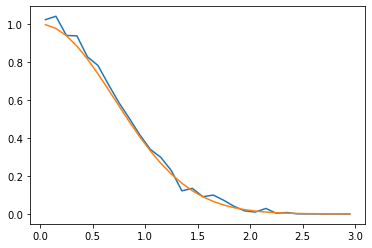

In [6]:
from pylab import *
%matplotlib inline

plot(qx,Pval)
plot(qx, exp(-qx**2));

### 1D Convolutions

The power of Metropolis integration is that we have freedom to pick an appropriate normalized function. This can come from physical intuition into processes being modeled.
In most physical process the convolutions (correlations between particles) turn out to be important, hence convolution type ansatz considerably improves the precision. The convolutions can still be worked out analytically, even though they are more tedious to derive.

To derive the integral, we will concentrate on a specific form of convolution,i.e.,
\begin{eqnarray}
f_m(x_1,x_2,\cdots,x_n)= \sum_{j=1}^n g_j(x_j)\prod_{i=1,i\ne j}^n g_i(x_i) h_{ij}(x_j-x_i)
\end{eqnarray}
As before, the two functions can be determined self-consistently by projections
\begin{eqnarray}
&g_i(x)=&\int dy_1 dy_2\cdots dy_n |f(y_1,y_2,\cdots,y_n)|\delta(y_i-x)\\
&h_{ij}(x_j-x_i)=&\int dy_1 dy_2\cdots dy_n |f(y_1,y_2,\cdots,y_n)|\delta(x_j-x_i-(y_j-y_i))
\end{eqnarray}


To normalize $f_m$ we need to evaluate the integral
\begin{eqnarray}
\int dx_1\cdots dx_n f_m = \sum_{j=1}^n \int dx_j g(x_j) \prod_{i\ne j}^{n} \int dx_i g_i(x_i) h_{ij}(x_j-x_i) 
\end{eqnarray}
Withouth loss of generality, we will work out one term in the sum, namely,
\begin{eqnarray}
I^N = \int dx_N g(x_N) \prod_{i\ne N} \int dx_i g_i(x_i) h_{ij}(x_j-x_i) 
\end{eqnarray}
so that the end result is
\begin{eqnarray}
\int dx_1\cdots dx_n f_m = \sum_j I^j
\end{eqnarray}

This integral is combersome because all the functions are pice-wise
constant, which leads to somewhat lengthly derivations.
We can write
$x_N= \Delta (j_N + t)$, $x_i = \Delta(j_i + u)$ with $t\in[0,1]$ and
$u\in[0,1]$ and $j_i$ integers. Note that $g(\Delta(j+u))=g[j]$ for
any $u\in [0,1]$. For simplicity, 
below we will drop $\Delta$ inside function arguments, i.e.,
$g(\Delta(j+u))\equiv g(j+u)$

The integral can thus be turned into
\begin{eqnarray}
\int f_m = \Delta \sum_{j_N} g[j_N] \int_0^1 dt \prod_{i=1}^{N-1} 
\Delta \sum_{j_i} \int_0^1 du g_i(j_i+u) h_i(j_N+t-j_i-u) \\
=\Delta^N \sum_{j_N} g[j_N] \int_0^1 dt \prod_{i=1}^{N-1} 
\sum_{j_i} g_i[j_i] \int_0^1 du\; h_i(j_N-j_i+t-u) 
\end{eqnarray}
Since both $t$ and $u$ are in the interval $[0,1]$, $t-u$ is in the
interval $[-1,1]$, and there are two possibilities,

* $t-u<0$  $\rightarrow$ $h_i(j_N-j_i+t-u)=h_i[j_N-j_i-1]$ 
* $t-u>0$  $\rightarrow$ $h_i(j_N-j_i+t-u)=h_i[j_N-j_i]$

we thus recognize
\begin{eqnarray}
\int_0^1 du\; 
h_i(j_N-j_i+t-u) = 
\int_0^1 du\; 
\left(\begin{array}{c}
h_i[j_N-j_i] \Theta(0<u<t))  \\
 h_i[j_N-j_i-1] \Theta(t<u<1) 
\end{array}\right)
\\
=h_i[j_N-j_i-1] (1-t) +  h_i[j_N-j_i] t
%\\=h_i[j_N-j_i]  + (h_i[j_N-j_i-1]-h_i[j_N-j_i])(1-t)
\end{eqnarray}

We can define new arrays
\begin{eqnarray}
a_i[j_N] &=& \Delta \sum_j g_i[j] h_i[j_N-j] \\
b_i[j_N] &=& \Delta \sum_j g_i[j] (h_i[j_N-j_i-1]-h_i[j_N-j_i])\\
\end{eqnarray}
to obtain the final integral
\begin{eqnarray}
I^N =\Delta \sum_{j_N} g[j_N] 
\int_0^1 dt \prod_{i=1}^{N-1}
\left( a_i[j_N] + b_i[j_N] t \right) 
\end{eqnarray}
which can be expanded to a polynomial of $N-1$-th order, and evaluated
\begin{eqnarray}
I^N =\Delta \sum_{j_N} g[j_N] 
\left(
\prod_{i=1}^{N-1} a_i[j_N]+
\cdots
+ \frac{1}{N}\prod_{i=1}^{N-1} b_i[j_N] \right) 
\end{eqnarray}
Once we know the integral $\int f_m$, we scale all $h_i$ by
$h_i \rightarrow \frac{h_i}{(\int f_m)^{1/(N-1)}}$


###  3D convolutions

Multiple 3D-type ingerals are very common, and deserve special
attention. It is many times physically more appropriate to write the
ansatz in terms of radial functions $g(|\vec{r}_i|)$ rather than use
separate $g(x)$, $g(y)$, $g(z)$. We might want to use a convolution
ansatz of the form
\begin{eqnarray}
 f_m(\vec{r}_1,\vec{r}_2,\cdots,\vec{r}_n)= g_1(r_1) h_1(|\vec{r}_n-\vec{r}_1|)
g_2(r_2)h_2(|\vec{r}_n-\vec{r}_2|)\cdots g_n(r_n)
\end{eqnarray}
The histogram for projections to $|\vec{r}_i|$ and $|\vec{r}_n-\vec{r}_i|$ is
straighforward to obtain during simulation.

The analytic integral $\int f_m$ is somewhat more challenging for 3D
case. We derive it below:
\begin{eqnarray}
\int f_m = \int d^3r_n g_n(r_n)\prod_i \int d^3 r_i g_i(r_i)
  h_i(|\vec{r}_n-\vec{r}_i|)
\\=
4\pi  \int d r_n r_n^2 g_n(r_n)\prod_{i=1}^{n-1}\int dr_i
  2\pi r_i^2 
\\
\int_{-1}^1 d(\cos\theta)g_i(r_i)  h_i(\sqrt{r_n^2+r_i^2-2 r_n r_i \cos(\theta)})
\end{eqnarray}

\begin{eqnarray}
\int f_m =
2 (2\pi)^n  \int d r_n r_n^{3-n} g_n(r_n)\prod_{i=1}^{n-1}\int dr_i r_i g_i(r_i)  
\int_{|r_n-r_i|}^{r_n+r_i} dx\, x\, h_i(x) 
\end{eqnarray}
Next we integrate over pice-wise constant functions
\begin{eqnarray}
r_n = j_n + t\\
r_i = j + u
\end{eqnarray}
with $t\in[0,1]$ and $u\in[0,1]$, and we get
\begin{eqnarray}
&&\int f_m =
2 (2\pi\Delta^3)^n  \sum_{j_n}  g_n[j_n]\int_0^1 dt (j_n+t)^{3-n}\times
\nonumber\\
&& \times
\prod_{i=1}^{n-1}\sum_j g_i[j] \int_0^1 du (j+u) 
\int_{|j_n-j+t-u|}^{j_n+j+t+u} dx\, x\, h_i(x) 
\end{eqnarray}
Lets define
\begin{eqnarray}
F_i(j_n+t) \equiv \sum_j g_i[j] \int_0^1 du (j+u) 
\int_{|j_n-j+t-u|}^{j_n+j+t+u} dx\, x\, h_i(x) 
\end{eqnarray}
and by power counting we can see that $F_i(t)$ is polynomial in $t$ of the forth order.

The derivation of polynomials $F_i[j_n](t)$ is somewhat tedious and
will be given below in Sec.(Integrals $K_n$).
But before that, lets us show how to compute the integral $\int f_m$
if the polynomials $F_i[j_n](t)$ are given:
\begin{eqnarray}
\int f_m =
2 (2\pi\Delta^3)^n  \sum_{j_n}  g_n[j_n]\int_0^1 dt (j_n+t)^{3-n}
\prod_{i=1}^{n-1} F_i[j_n](t)
\label{Eq:31}
\end{eqnarray}
Note that 
$\prod_{i=1}^{n-1} F_i[j_n](t)$ is a polynomial of $4(n-1)$-th order,
and we write it as
\begin{eqnarray}
\prod_{i=1}^{n-1} F_i[j_n](t)  \equiv \sum_{k=0}^{4(n-1)} a_k t^k
\end{eqnarray}
Such multiplication of polynomials can be straighforwardly implemented
on the computer, and if polynomials $F_i[j_n](t)$ are known, the coefficients $a_k$ are easy to determine.

The integral of the function $f_m$ than requires one to evaluate
\begin{eqnarray}
K_n[j_n]= \int_0^1 dt (j_n+t)^{3-n} \sum_{k=0}^{4(n-1)} a_k t^k
\end{eqnarray}
so that the final result becomes
\begin{eqnarray}
\int f_m =2 (2\pi\Delta^3)^n  \sum_{j_n}  g_n[j_n] K_n[j_n]
\end{eqnarray}



#### Integrals $K_n$

For $n \ge 3$ all powers in the integral $K_n$ are positive, and we can write
\begin{eqnarray}
K_n[j]= 
\sum_{p=0}^{3-n} 
{3-n\choose p}
(j)^p \sum_{k=0}^{4(n-1)} a_k \int_0^1 dt\, t^{3-n-p+k}
\\
=
\sum_{p=0}^{3-n} 
{3-n\choose p}
(j)^p \sum_{k=0}^{4(n-1)} \frac{a_k}{4+k-n-p} 
\end{eqnarray}
For $n=4$ we have
\begin{eqnarray}
K_n[j]= \sum_{k=0}^{4(n-1)} a_k \int_0^1 dt \frac{t^k}{j+t}
\end{eqnarray}
which can be computed by recursion. Let's define
\begin{eqnarray}
I_k[j]\equiv \int_0^1 dt \frac{t^k}{j+t}
\end{eqnarray}
so that 
\begin{eqnarray}
K_n[j]= \sum_{k=0}^{4(n-1)} a_k I_k[j]
\end{eqnarray}
It is easy to see that $I_0[j]=\log(\frac{j+1}{j})$ and that 
$$I_{k+1}[j]=\int_0^1 t^k dt - j I_k[j]= \frac{1}{k+1} -  j I_k[j]$$
which gives
$$I_k[j] = \sum_{p=0}^{k-1}\frac{ (-j)^p}{k-p} + (-j)^k  \log(\frac{j+1}{j})$$

Finally, for $n>4$, we define
$$ I^p_k[j] = \int_0^1 \frac{t^k}{(j+t)^{p+1}} dt$$
so that $K_n$ can be simply computed by
\begin{eqnarray}
K_n[j_n]= \sum_{k=0}^{4(n-1)} a_k I_k^{n-4}[j_n]
\end{eqnarray}
and we derive the recursion relation for integrals
$I_k^p[j]$. Notice that the previous case $n=4$ corresponds to $p=0$,
but now we will derive recurison for any $n \ge 4$.

We notice that
\begin{eqnarray}
I_{k+1}^p= I_k^{p-1}- j\, I_k^p, 
\label{Eq:recursion}
\end{eqnarray}
which follows from the definition
\begin{eqnarray}
I^p_{k+1} = \int_0^1 \frac{t^k(t+j-j)}{(j+t)^{p+1}} dt = \int_0^1
  \frac{t^k}{(j+t)^{p}} dt -j\int_0^1 \frac{t^k}{(j+t)^{p+1}} dt
\end{eqnarray}
This can be used to compute any $I_k^p$ if we know 
$I^{-1}_k$, which is simply given by 
$$I^{-1}_k=\frac{1}{k+1}$$ and 
$I_0^p$ for
arbitrary $p$. We notice that
\begin{eqnarray}
I^{p>0}_{0} = \int_0^1 \frac{1}{(j+t)^{p+1}} dt = \frac{1}{p}\left(\frac{1}{j^p}-\frac{1}{(j+1)^p}\right)
\end{eqnarray}
and $I^0_0 = \log\left(\frac{j+1}{j}\right)$
hence the above recursion gives an arbitrary $I_k^p$.

To show that all $I_k^p$ are now determined, lets show for a first few
$p$. For $p=0$ we get
\begin{eqnarray}
I^0_{k+1}= I^{-1}_k - j I^0_k = \frac{1}{k+1} - j I^0_k 
\end{eqnarray}
which is exactly the recursion relation we derived earlier.
Once all $I^0_k$ are determined, we can proceed to compute $I^1_{k}$ by the
recursion
\begin{eqnarray}
I^1_{k+1}= I^{0}_k - j I^1_k
\end{eqnarray}
Since we know $I^1_0$, all $I^1_k$ can readily be obtained from this
recursion relation. And once $I^1_k$ are known, $I^2_k$ are determined
by the recursion relation specified above $I_{k+1}^p= I_k^{p-1}- j\, I_k^p$  
